In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from seaborn import heatmap
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# NLP Tools
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# TrainSplit and Fit model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import TweetTokenizer

# model selection
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
ds = pd.read_csv('labeled_data.csv')

In [7]:
ds.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [9]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [10]:
# class - 0 -> hate, 1-> offensive 2-> neither
dt_transformed = ds[['class','tweet']]
dt_transformed.tail()

,class,tweet
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies
24782,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [11]:
y = (dt_transformed.iloc[::-1].values).ravel()
y

array([2,
       '~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB',
       1, ...,
       '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
       2,
       "!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."],
      dtype=object)

In [12]:
df_train,df_test = train_test_split(dt_transformed,test_size = 0.10, random_state = 42,stratify=dt_transformed['class'])

In [13]:
df_train.shape, df_test.shape

((22304, 2), (2479, 2))

In [14]:
# dividing df into training and validation set
df_train, df_val = train_test_split(df_train, test_size=0.10,random_state=42, stratify=df_train['class'])

In [15]:
df_train.shape, df_val.shape

((20073, 2), (2231, 2))

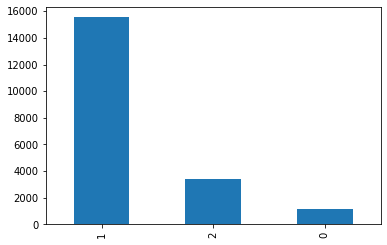

In [16]:
df_train['class'].value_counts().plot(kind='bar')

In [17]:
# CLEANING THE TEXTS


In [18]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:
        review = re.sub(r"@[A-Za-z0-9_]+"," ", tweet)
        review = re.sub('RT', ' ', review)
        review = re.sub(r"https://[A-Za-z0-9./]+", " ", review)
        review = re.sub(r"https?"," ", review)
        review = re.sub('[^a-zA-Z]',' ', review)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word)>2]
        review = ' '.join(review)
        corpus.append(review)
    return np.array(corpus)

In [19]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [20]:
c_train = preprocessing(df_train['tweet'].values)
c_val = preprocessing(df_val['tweet'].values)

In [21]:
c_train[0:10],c_val[0:10]

(array(['stop hoe', 'nation know rather real nigger amp bad bitch tnhxzaf',
        'slander exist make cum everi bad thing say regist cuz got pussi',
        'dish texa trash talk pt racist mayb gbush apolog sin hide',
        'one charlott store cours faggot',
        'makeup call cheek call bitch spot lmao',
        'porn android iphon ipad sex xxx oldyoung old bitch pleas hot look young stud aidkdmztln',
        'pussi', 'guy tweet shit get bunch favorit level hoe',
        'let support nicca matter'], dtype='<U124'),
 array(['isi support america jihadi next door aimv gib ajuau ywiv',
        'class ghetto hell',
        'christianbal kiss mose ass fight god otherwis might fuck dead retard ass actor faggot',
        'hoe fuck want seem like hoe gotta hit low',
        'goauch monkey oldpaint vinyl jazz loung hueh hcxx',
        'rememb bitch wouldnt let nigga fuck like month day',
        'pull panti teeth write alphabet tongu throb pussi',
        'boyfriend brother drop pick bitc

In [22]:
# Extracting features using tokenization

In [23]:
tweet_tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer = "word", tokenizer = tweet_tokenizer.tokenize, max_features = 1010)
def tokenize(corpus, flag = 0):
#    flag = 1 for train
    if flag :
        return vectorizer.fit_transform(corpus).toarray()
    return vectorizer.transform(corpus).toarray()

In [24]:
X_train = tokenize(c_train, 1)
X_val = tokenize(c_val, 0)
y_train = df_train['class'].values
y_val = df_val['class'].values
X_train.shape, y_train.shape

((20073, 1010), (20073,))

In [25]:
# Logistic Regression
model = LogisticRegression(multi_class = 'ovr', solver = 'liblinear', random_state = 42)
model.fit(X_train, y_train.ravel())
y_hat = model.predict(X_val)

In [26]:
def set_confusion_matrix(clf, X, y, title):
    plot_confusion_matrix(clf, X, y)
    plt.title(title)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


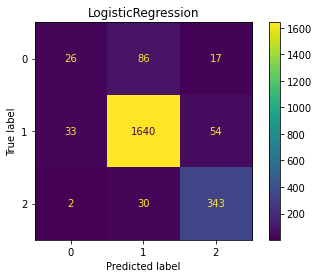

In [27]:
set_confusion_matrix(model,X_val, y_val, type(model).__name__)

In [28]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_hat, target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.43      0.20      0.27       129
     class 1       0.93      0.95      0.94      1727
     class 2       0.83      0.91      0.87       375

    accuracy                           0.90      2231
   macro avg       0.73      0.69      0.69      2231
weighted avg       0.89      0.90      0.89      2231



In [29]:
# Analyzing words of each class

In [30]:
set_ = c_train
hate_tweets = [sentence for sentence, label in zip(set_,y) if label == 0]
off_tweets = [sentence for sentence, label in zip(set_, y) if label == 1]
none_tweets = [sentence for sentence, label in zip(set_, y) if label == 2]

In [31]:
hate_words = ' '.join(hate_tweets)
off_words = ' '.join(off_tweets)
none_words = ' '.join(none_tweets)

In [32]:
def get_wordcloud(text):
#   Creating and generating word cloud image
    wordcloud = WordCloud().generate(text)
#   Displaying generated image
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show

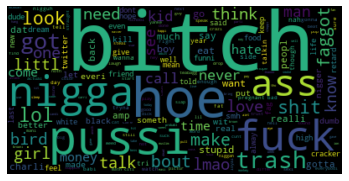

In [33]:
get_wordcloud(hate_words)

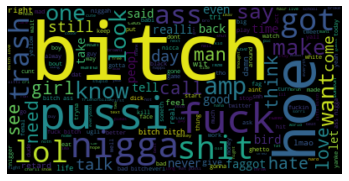

In [34]:
get_wordcloud(off_words)

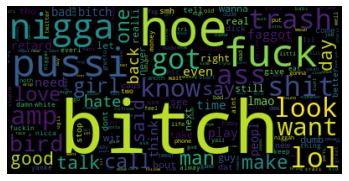

In [35]:
get_wordcloud(none_words)

In [36]:
def wordListToFreqDict(wordlist):
    wordfreq = [(wordlist.count(p))/len(wordlist) for p in wordlist]
    return dict(list(zip(wordlist, wordfreq)))

In [37]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [38]:
hate_dict = sortFreqDict(wordListToFreqDict(hate_words.split()))
off_dict = sortFreqDict(wordListToFreqDict(off_words.split()))
none_dict = sortFreqDict(wordListToFreqDict(none_words.split()))

In [39]:
len(hate_dict), len(off_dict), len(none_dict)

(1429, 9079, 3664)

In [40]:
# Taking the words that appear the most in each class
def get_common(wordlist, n):
    return ([w[1] for w in wordlist])[:n]
common_words = list()
common_words.append(get_common(hate_dict, 2000))
common_words.append(get_common(off_dict, 1000))
common_words.append(get_common(none_dict, 1000))
common_words = np.unique(np.hstack(common_words))

In [41]:
common_words_dict = ({i:j for i,j in zip(common_words, range(len(common_words)))})

In [42]:
X_train = tokenize(c_train, 1)
X_val = tokenize(c_val, 0)
X_train.shape, X_val.shape

((20073, 1010), (2231, 1010))

UNDERSAMPLING - Changing the composition of a training dataset for an imbalanced classification task by over sampling minority class  

In [43]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_off, n_none, n_hate

(15543, 3372, 1158)

In [44]:
df_hate = df_train[df_train['class'] == 0]
df_off = df_train[df_train['class'] == 1]
df_none = df_train[df_train['class'] == 2]

In [45]:
df_off_under = df_off.sample(n_hate, random_state = 0)
df_none_under = df_none.sample(n_hate, random_state = 0)
df_under = pd.concat([df_hate, df_off_under, df_none_under], axis = 0)
print(df_under['class'].value_counts())
df_under.head()

0    1158
1    1158
2    1158
Name: class, dtype: int64


,class,tweet
21589,0,"The nations know who we are, but we rather be ..."
5360,0,@_TurnDownDre @Jordan__Grimes @kushdaddycorr @...
9276,0,"Fuck that niggah he so weak, he cant tell that..."
21557,0,The fucking Royals bitch! Work!
12858,0,Minus all the retarded poor bots.


In [46]:
# Training models with this data

In [47]:
c_train = preprocessing(df_under['tweet'].values)
c_val = preprocessing(df_val['tweet'].values)

In [48]:
X_train = tokenize(c_train, 1)
X_val = tokenize(c_val, 0)
y_train = df_under['class'].values
y_val = df_val['class'].values
X_train.shape, X_val.shape

((3474, 1010), (2231, 1010))

In [49]:
# Logistic Regression
model_under = LogisticRegression(multi_class = 'ovr', solver = 'liblinear', random_state = 0)
model_under.fit(X_train, y_train.ravel())
y_pred = model_under.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


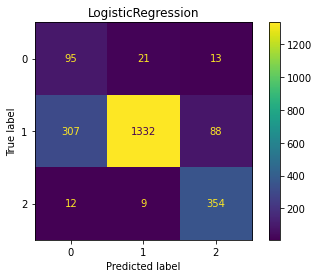

In [50]:
set_confusion_matrix(model_under, X_val, y_val, type(model_under).__name__)

In [51]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.23      0.74      0.35       129
     class 1       0.98      0.77      0.86      1727
     class 2       0.78      0.94      0.85       375

    accuracy                           0.80      2231
   macro avg       0.66      0.82      0.69      2231
weighted avg       0.90      0.80      0.83      2231



In [52]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_val)
print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (y_val != y_pred.ravel()).sum()))
print(classification_report(y_val, y_pred, target_names=target_names))

Number of mislabeled points out of a total 2231 points : 589
              precision    recall  f1-score   support

     class 0       0.11      0.28      0.16       129
     class 1       0.85      0.85      0.85      1727
     class 2       0.76      0.37      0.50       375

    accuracy                           0.74      2231
   macro avg       0.57      0.50      0.50      2231
weighted avg       0.79      0.74      0.75      2231



In [53]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train.ravel()).predict(X_val)
print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (y_val != y_pred.ravel()).sum()))
print(classification_report(y_val, y_pred, target_names=target_names))

Number of mislabeled points out of a total 2231 points : 562
              precision    recall  f1-score   support

     class 0       0.19      0.78      0.30       129
     class 1       0.98      0.72      0.83      1727
     class 2       0.78      0.88      0.82       375

    accuracy                           0.75      2231
   macro avg       0.65      0.79      0.65      2231
weighted avg       0.90      0.75      0.80      2231



In [54]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_val)
print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (y_val != y_pred.ravel()).sum()))
print(classification_report(y_val, y_pred, target_names=target_names))

Number of mislabeled points out of a total 2231 points : 376
              precision    recall  f1-score   support

     class 0       0.37      0.60      0.46       129
     class 1       0.98      0.82      0.89      1727
     class 2       0.63      0.98      0.77       375

    accuracy                           0.83      2231
   macro avg       0.66      0.80      0.71      2231
weighted avg       0.89      0.83      0.85      2231



In [55]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
y_pred = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train, y_train).predict(X_val)
clf.score(X_val, y_val)

0.8314657104437472

OVERSAMPLING

In [56]:
n_off, n_none, n_hate = df_train['class'].value_counts()
n_hate, n_off, n_none

(1158, 15543, 3372)

In [57]:
df_hate_over = df_hate.sample(n_off, replace=True, random_state = 0)
df_none_over = df_none.sample(n_off, replace=True, random_state = 0)
df_over = pd.concat([df_off, df_hate_over, df_none_over], axis = 0)
print(f"Random over sampling:\n {df_over['class'].value_counts()}")

Random over sampling:
 1    15543
0    15543
2    15543
Name: class, dtype: int64


In [58]:
c_train = preprocessing(df_over['tweet'].values)
c_val = preprocessing(df_val['tweet'].values)
X_train = tokenize(c_train, 1)
X_val = tokenize(c_val, 0)
y_train = df_over['class'].values
y_val = df_val['class'].values
X_train.shape, X_val.shape

((46629, 1010), (2231, 1010))

In [59]:
# Logistic Regression
model_over = LogisticRegression(multi_class = 'ovr', solver = 'liblinear', random_state = 0)
model_over.fit(X_train,y_train.ravel())
y_pred = model_over.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


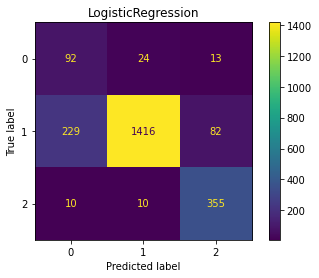

              precision    recall  f1-score   support

     class 0       0.28      0.71      0.40       129
     class 1       0.98      0.82      0.89      1727
     class 2       0.79      0.95      0.86       375

    accuracy                           0.84      2231
   macro avg       0.68      0.83      0.72      2231
weighted avg       0.90      0.84      0.86      2231



In [60]:
set_confusion_matrix(model_over, X_val, y_val, type(model_over).__name__)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_pred, target_names=target_names))

In [61]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_val)
print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (y_val != y_pred.ravel()).sum()))
print(classification_report(y_val, y_pred, target_names=target_names))

Number of mislabeled points out of a total 2231 points : 1662
              precision    recall  f1-score   support

     class 0       0.07      0.89      0.13       129
     class 1       0.92      0.15      0.26      1727
     class 2       0.76      0.53      0.62       375

    accuracy                           0.26      2231
   macro avg       0.58      0.52      0.34      2231
weighted avg       0.84      0.26      0.31      2231



In [62]:
# Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train.ravel()).predict(X_val)
print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (y_val != y_pred.ravel()).sum()))
print(classification_report(y_val, y_pred, target_names=target_names))

Number of mislabeled points out of a total 2231 points : 332
              precision    recall  f1-score   support

     class 0       0.28      0.48      0.35       129
     class 1       0.94      0.88      0.91      1727
     class 2       0.81      0.86      0.84       375

    accuracy                           0.85      2231
   macro avg       0.68      0.74      0.70      2231
weighted avg       0.88      0.85      0.86      2231



In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_val)
print("Number of mislabeled points out of a total %d points : %d" % (X_val.shape[0], (y_val != y_pred.ravel()).sum()))
print(classification_report(y_val, y_pred, target_names=target_names))

Number of mislabeled points out of a total 2231 points : 388
              precision    recall  f1-score   support

     class 0       0.36      0.59      0.45       129
     class 1       0.98      0.81      0.89      1727
     class 2       0.62      0.98      0.76       375

    accuracy                           0.83      2231
   macro avg       0.65      0.79      0.70      2231
weighted avg       0.88      0.83      0.84      2231



In [64]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
y_pred = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=0).fit(X_train, y_train).predict(X_val)
clf.score(X_val, y_val)

0.8260869565217391

Oversampling resulted in better results, increasing accuracy from 0.45 to 0.86. We acheived a lower overall f1-score compared to training without data augmentation.
The balance of results leads us to prefer this solution. 


### Prediction of test data

In [65]:
c_test = preprocessing(df_test['tweet'].values)
c_test.shape

(2479,)

In [66]:
X_test = tokenize(c_test,0)
y_test = df_test['class']
X_test.shape, y_test.shape

((2479, 1010), (2479,))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


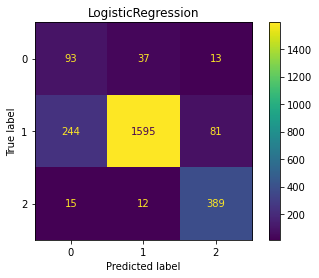

              precision    recall  f1-score   support

     class 0       0.26      0.65      0.38       143
     class 1       0.97      0.83      0.90      1920
     class 2       0.81      0.94      0.87       416

    accuracy                           0.84      2479
   macro avg       0.68      0.81      0.71      2479
weighted avg       0.90      0.84      0.86      2479



In [67]:
y_pred = model_over.predict(X_test)
set_confusion_matrix(model_over, X_test, y_test, type(model_over).__name__)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names = target_names))